In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [ ]:
import pandas as pd

In [ ]:
#df= pd.read_csv('D:/0.0 Jupyter Notebook/ps2_data.csv')
df= pd.read_csv('ps2_data.csv')
df

,Date,VW-Index,IBM,USX,GM,Rf
0,30-Jan-26,0.00043,-0.01038,-0.01472,0.07447,0.00298
1,27-Feb-26,-0.03205,-0.02448,-0.05322,-0.01188,0.00301
2,31-Mar-26,-0.06458,-0.11559,-0.03200,-0.02541,0.00257
3,30-Apr-26,0.03726,0.08978,0.01756,0.10949,0.00257
4,28-May-26,0.01455,0.03693,0.02944,-0.02914,0.00224
...,...,...,...,...,...,...
883,31-Aug-99,-0.00961,-0.00800,0.03160,0.09202,0.00363
884,30-Sep-99,-0.02316,-0.02860,-0.06024,-0.05000,0.00367
885,29-Oct-99,0.06118,-0.18802,-0.00427,0.11917,0.00368
886,30-Nov-99,0.03293,0.05020,-0.08506,0.02928,0.00357


### Mean and Std for all index between 1-Jan-1926 and 31-Dec-1999

In [ ]:
from scipy import stats
df1= df.iloc[:, 1:]+1
mean_i=[]
for i in range(5):
    mean_i.append(stats.gmean(df1.iloc[:,i],axis=0)-1)
print("Geometric means are")
print(mean_i)

Geometric means are
[0.008628478825573493, 0.012479518574236348, 0.0051212874964268185, 0.009918902500240412, 0.002961803591565726]


In [ ]:
std_a=[]
# a = np.std(df1.iloc[:,1])
for i in range(1,6):
    std_a.append(np.std(df.iloc[:,i]))
print("Standard deviations are:")
print(std_a)

Standard deviations are:
[0.0548437188418915, 0.06794077544072043, 0.092468620525805, 0.08378180745198777, 0.002438442714521311]


In [ ]:
df_describe = df.describe()
selected_index = ['mean', 'std','Geometric mean']
a_series = pd.Series(mean_i, index = df_describe.columns)
a_series.name='Geometric mean'
df_describe = df_describe.append(a_series, ignore_index=False)
df_describe.loc[selected_index,:]
# df_describe.append(df_gmean.T, ignore_index = True)

,VW-Index,IBM,USX,GM,Rf
mean,0.010129,0.014761,0.009149,0.013265,0.002965
std,0.054875,0.067979,0.092521,0.083829,0.002440
Geometric mean,1.008628,1.012480,1.005121,1.009919,1.002962


### covariance between each of the stocks

In [ ]:
selected_stocks = df[['IBM','USX','GM']]

In [ ]:
cov_m=selected_stocks.cov()
cov_m

,IBM,USX,GM
IBM,0.004621,0.002613,0.002841
USX,0.002613,0.008560,0.004409
GM,0.002841,0.004409,0.007027


### Normalised covariance (correlation)

In [ ]:
selected_stocks.corr()

,IBM,USX,GM
IBM,1.000000,0.415461,0.498464
USX,0.415461,1.000000,0.568496
GM,0.498464,0.568496,1.000000


In [ ]:
stdv=[0.06794077544072043, 0.092468620525805, 0.08378180745198777]
for i in range(3):
    cov_m.iloc[:,i]=cov_m.iloc[:,i]/(stdv[i])
    cov_m.iloc[i,:]=cov_m.iloc[i,:]/(stdv[i])
cov_m

,IBM,USX,GM
IBM,1.001127,0.415929,0.499026
USX,0.415929,1.001127,0.569137
GM,0.499026,0.569137,1.001127


### Random generating returns with same mean and std as GM return

In [ ]:
# Extract GM stock return during the time interval interested
df_GM = df[['Date','GM']]

In [ ]:
df_GM

,Date,GM
0,30-Jan-26,0.07447
1,27-Feb-26,-0.01188
2,31-Mar-26,-0.02541
3,30-Apr-26,0.10949
4,28-May-26,-0.02914
...,...,...
883,31-Aug-99,0.09202
884,30-Sep-99,-0.05000
885,29-Oct-99,0.11917
886,30-Nov-99,0.02928


In [ ]:
mean, std = 0.013265, 0.083829 # GM's mean and standard deviation
gm_sample = np.random.normal(mean, std, df_GM.shape[0])
df_GM['rand']=pd.Series(gm_sample)
df_GM = df_GM.set_index('Date')

<ipython-input-78-2f47e22d04cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GM['rand']=pd.Series(gm_sample)


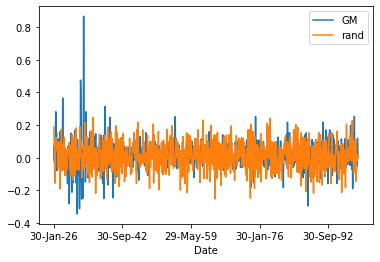

In [ ]:
df_GM.plot()

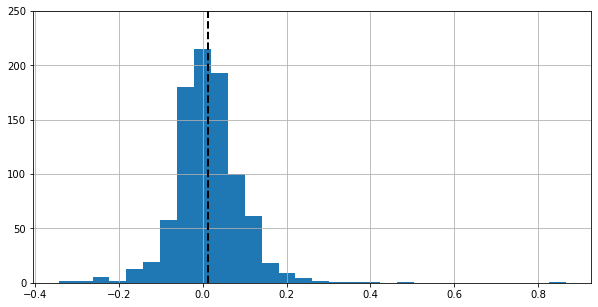

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 250)
df_GM['GM'].hist(bins=30)
plt.axvline(df_GM['GM'].mean(), color='k', linestyle='dashed', linewidth=2)

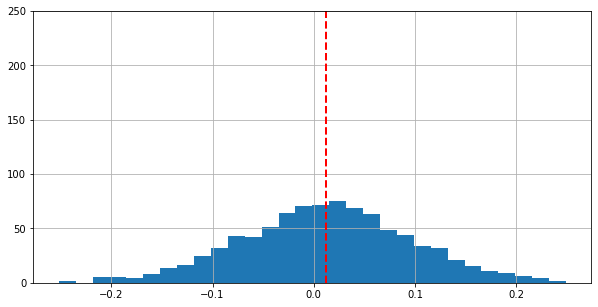

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 250)
df_GM['rand'].hist(bins=30)
plt.axvline(df_GM['rand'].mean(), color='r', linestyle='dashed', linewidth=2)